<a href="https://colab.research.google.com/github/EngComp-Henrique/Numerical-methods/blob/main/Exercise_list_the_bisection_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center'>
    <h1><u>Métodos numéricos</u></h1>
</div>

## Descrição

Lista de exercícios referente ao conteúdo de *Solução de Equações Não Lineares Univariadas* (semana 4)

## Conteúdos
1. Erros e tipos de erros
2. Método da Bisseção
3. Método da Falsa Posição

### Algoritmos e bibliotecas para as soluções

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definição de algoritmos que serão utilizados ao longo da resolução dos exercícios

In [2]:
def abs_error(x1, x2):
    """Método que calcula o erro relativo entre dois valores"""
    return (x1 - x2) / x1


class BisectionMethod:
    """
    Class que encontra as raízes de funções, usando como critério de parada tanto o erro como quando n° de iterações
    """

    def error(self, function, a, b, tol=0.0001):
        """
        Realiza o algoritmo de bisseção, considerando como critério de parada uma tolerância
        Quando o valor do erro for menor que a tolerância, então podemos parar
        """
        interval = [a, b]
        x = []
        errors = [float('inf')]
        if np.sign(function(a)) * np.sign(function(b)) != -1:
            return None
        while True: 
            if abs(errors[-1]) < tol:
                break
            xi = (interval[0] + interval[1]) / 2
            x.append(xi)
            if len(x) > 1:
                error = abs_error(x[-2], x[-1])
                errors.append(error)
            if function(xi) == 0:
                return xi
            else:
                if np.sign(function(interval[0])) * np.sign(function(xi)) == -1:
                    interval[1] = xi
                else:
                    interval[0] = xi
        return x[-1]

    def iter(self, function, a, b, n=10):
        """
        Realiza o algoritmo de bisseção, considerando como critério de parada o número de iterações
        """
        interval = [a, b]
        x = []
        if np.sign(function(a)) * np.sign(function(b)) != -1:
            return None
        for i in range(n):
            xi = (interval[0] + interval[1]) / 2
            x.append(xi)
            if function(xi) == 0:
                return xi
            else:
                if np.sign(function(interval[0])) * np.sign(function(xi)) == -1:
                    interval[1] = xi
                else:
                    interval[0] = xi
        return x[-1]

### Questão 1

**Solução 1**: Usando tolerância como critério de parada

- Definindo funções a serem utilizadas e instanciando classe `BisectionMethod()`

In [3]:
bisection_method = BisectionMethod()

In [4]:
g = lambda x: (x - 2) ** 2 - 4
h = lambda x: 2 - np.exp(x)

In [5]:
ans= bisection_method.error(function=h, a=0, b=1)
if ans is not None:
    print(ans)
else:
    print("Não há raizes no intervalo solicitado")

0.69317626953125


In [6]:
ans= bisection_method.error(g, 3, 6)
if ans is not None:
    print(ans)
else:
    print("Não há raizes no intervalo solicitado")

4.0001220703125


### Questão 2

**Definindo função**

In [7]:
f = lambda x: -0.5 * x ** 2 + 2.5 * x + 4.5

**Solução letra A)**

Solução utilizando matplotlib para visualizar as raízes

In [8]:
x = np.linspace(5 * -np.pi, 5 * np.pi, 100)
fx = np.array([f(x) for x in np.linspace(5 * -np.pi, 5 * np.pi, len(x))])

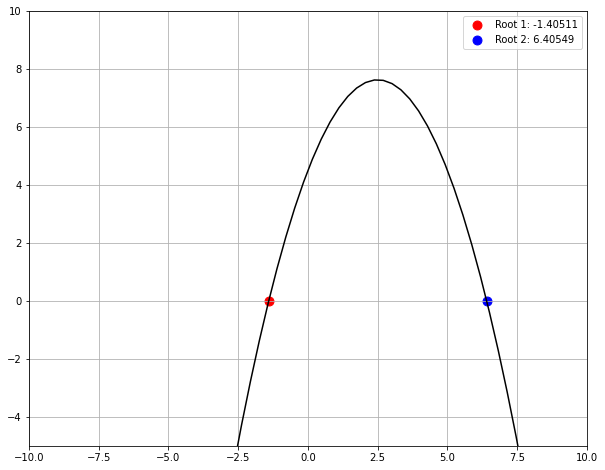

In [9]:
def plot_roots(root1, root2):
    plt.figure(figsize=(10, 8))
    plt.plot(x, fx, color='black')
    plt.scatter(root1, [0], color='red', label=f'Root 1: {root1:.5f}', s=10*4*2, alpha=1)
    plt.scatter(root2, [0], color='blue', label=f'Root 2: {root2:.5f}', s=10*4*2, alpha=1)
    plt.xlim([-10, 10])
    plt.ylim([-5, 10])
    plt.legend()
    plt.grid()
    plt.show()

plot_roots(bisection_method.error(f, -20, 0), bisection_method.error(f, 0, 30))

**Solução letra B)**

Consiste em utilizar a fórmula:

$$
\dfrac{-b \pm\sqrt{b^{2}-4.a.c}}{2.a}
$$

In [10]:
def delta(a, b, c):
    return (b ** 2) - (4 * a * c)

def quadratic_formula(a, b, c):
    delta_value = delta(a, b, c)
    root1 = (-b + np.sqrt(delta_value)) / (2 * a)
    root2 = (-b - np.sqrt(delta_value)) / (2 * a)
    return root1, root2

In [11]:
root1, root2 = quadratic_formula(-0.5, 2.5, 4.5)
print(f"Root1 = {root1}      Root2 = {root2}")

Root1 = -1.405124837953327      Root2 = 6.405124837953327


**Solução letra C)**

In [12]:
def iter_bm(function, a, b, n=10):
    interval = [a, b]
    x = []
    errors = []
    print()
    if np.sign(function(a)) * np.sign(function(b)) != -1:
        return None
    for i in range(n):
        xi = (interval[0] + interval[1]) / 2
        x.append(xi)
        if len(x) > 1:
            error = abs_error(interval[-2], interval[-1])
            errors.append(error)
            print(f"x1 = {interval[-2]:<8}x2 = {interval[-1]:<8}Erro relativo entre x1 e x2 = {error}")
        if function(xi) == 0:
            return xi
        else:
            if np.sign(function(interval[0])) * np.sign(function(xi)) == -1:
                interval[1] = xi
            else:
                interval[0] = xi
    return x[-1]

In [13]:
print(f"{'-' * 50}\nRaízes de f: [5, 10] -> R = {iter_bm(f, 5, 10, 3)}")


x1 = 5       x2 = 7.5     Erro relativo entre x1 e x2 = -0.5
x1 = 6.25    x2 = 7.5     Erro relativo entre x1 e x2 = -0.2
--------------------------------------------------
Raízes de f: [5, 10] -> R = 6.875


In [14]:
print(f"Erro = {root2 - bisection_method.iter(f, 5, 10, 3)}")

Erro = -0.469875162046673


### Questão 3

Definindo funções de teste

In [15]:
w = lambda x: np.sin(x)
k = lambda x: x ** 3
h = lambda x: w(x) - k(x)

Procurando raízes das funções estabelecidas acima

In [16]:
if bisection_method.error(w, 0.5, 1, 0.02) is not None:
    print(f"Raiz w(x): [0.5, 1] -> Reais = {bisection_method.error(w, 0.5, 1, 0.02)}")
else:
    print("Não há raizes para w(x) no intervalo solicitado")

print()

if bisection_method.error(k, 0.5, 1, 0.02) is not None:
    print(f"Raiz k(x): [0.5, 1] -> Reais = {bisection_method.error(k, 0.5, 1, 0.02)}")
else:
    print("Não há raizes para k(x) no intervalo solicitado")

print()

if bisection_method.error(h, 0.5, 1, 0.02) is not None:
    print(f"Raiz h(x): [0.5, 1] -> Reais = {bisection_method.error(h, 0.5, 1, 0.02)}")
else:
    print("Não há raizes para h(x) no intervalo solicitado")

Não há raizes para w(x) no intervalo solicitado

Não há raizes para k(x) no intervalo solicitado

Raiz h(x): [0.5, 1] -> Reais = 0.921875


Definindo valores e plotando gráfico das funções

In [17]:
x = np.linspace(-np.pi, np.pi, 100)
wx = np.array([w(x) for x in np.linspace(-np.pi, np.pi, len(x))])
kx = np.array([k(x) for x in np.linspace(-np.pi, np.pi, len(x))])
hx = np.array([k(x) - w(x) for x in np.linspace(-np.pi, np.pi, len(x))])

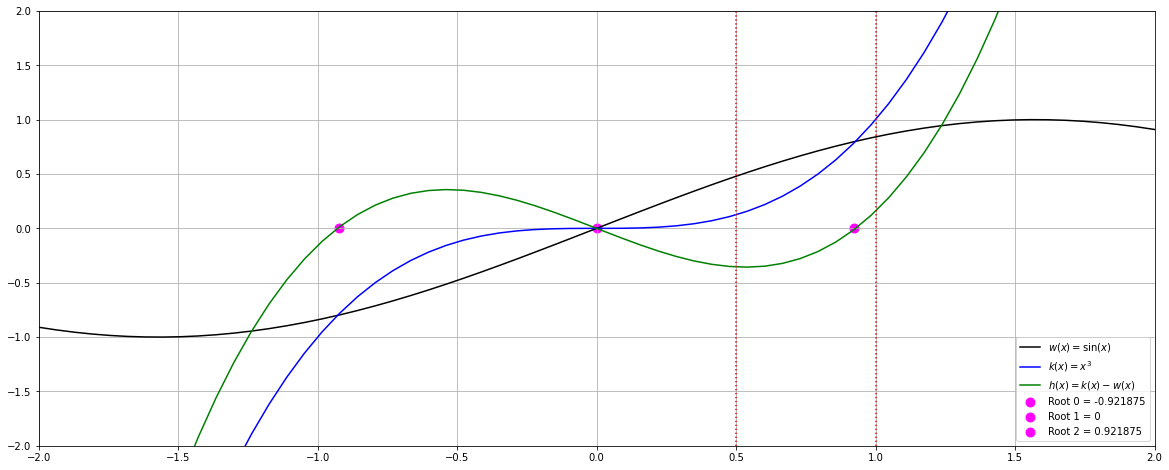

In [18]:
def plot_roots(*roots):
    plt.figure(figsize=(20, 8))
    plt.plot(x, wx, color='black', label='$w(x) = \sin(x)$')
    plt.plot(x, kx, color='blue', label='$k(x) = x^{3}$')
    plt.plot(x, hx, color='green', label='$h(x) = k(x) - w(x)$')
    for i, root in enumerate(roots):
        plt.scatter(root, [0], color='magenta', s=10*4*2, alpha=1.0, label=f"Root {i} = {root}")
    plt.axvline(x=0.5, color='red', ls=':')
    plt.axvline(x=1.0, color='red', ls=':')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

plot_roots(bisection_method.error(h, -1, -0.5, 0.02), 0, bisection_method.error(h, 0.5, 1, 0.02))

### Questão 4

Definindo funções para a serem usadas como caso de teste

In [19]:
f = lambda x: -2 * x ** 6 - 1.5 * x ** 4 + 10 * x + 20
dx = lambda x: -12 * x ** 5 - 6 * x ** 3 + 10

In [20]:
print(f'Raiz f\'(x) = 0, f\': [0, 1] -> Reais = {bisection_method.error(dx, 0, 1, 0.05)}')

Raiz f'(x) = 0, f': [0, 1] -> Reais = 0.84375


In [21]:
x = np.linspace(-np.pi, np.pi, 100)
fx = np.array([f(x) for x in np.linspace(-np.pi, np.pi, 100)])
dx_ = np.array([dx(x) for x in np.linspace(-np.pi, np.pi, 100)])

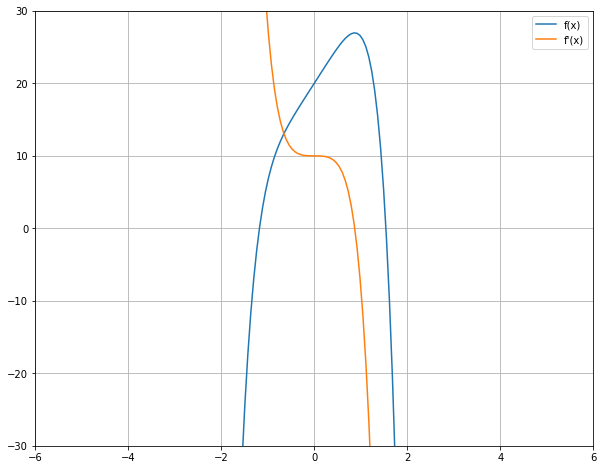

In [22]:
def plot_roots():
    plt.figure(figsize=(10, 8))
    plt.plot(x, fx, label=f'f(x)')
    plt.plot(x, dx_, label=f'f\'(x)')
    plt.ylim([-30, 30])
    plt.xlim([-6, 6])
    plt.grid()
    plt.legend()
    plt.show()

plot_roots()

### Questão 5

Método da Falsa Posição
$$
x^{*}=x_u-\dfrac{f(x_u)(x_l-x_u)}{f(x_l)-f(x_u)}
$$

Percebe-se que dado $x^{*}$ como sendo a raiz de uma função $f$ qualquer, temos que o método da falsa posição funcionará muito mais rápido que o método da bisseção, uma vez que, em termos de complexidade de algoritmo, temos $O(1)$ para o método da Falsa Posição, enquanto que o método da bisseção por força bruta levaria pelo $n$ iterações para encontrar a raiz $[O(n)]$.

In [23]:
def false_position_method(f, x0, x1, e=0.001):
    step = 1
    condition = True
    while condition:
        x2 = x0 - (x1-x0) * f(x0)/( f(x1) - f(x0) )
        if f(x0) * f(x2) < 0:
            x1 = x2
        else:
            x0 = x2
        step = step + 1
        condition = abs(f(x2)) > e
    return x2

In [24]:
g = lambda x: (x - 2) ** 2 - 4
h = lambda x: 2 - np.exp(x)

In [25]:
false_position_method(g, 5, 6)

4.000121936349226

In [26]:
false_position_method(h, 0, 1)

0.6927974084413778